In [238]:
import pandas as pd


# In[83]:
df = pd.read_csv('Data_Train.csv')
df.head(10)
print(df.shape)


(78458, 11)


In [239]:

#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
df.to_csv('Data_Train_Transformed_1.csv')
df = df[df['Views'] > df["Likes"]]
print(df.shape)
print(df.head())

(77170, 11)
   Unique_ID              Name     Genre Country  \
0     413890         Hardstyle  danceedm      AU   
1     249453        Dj Aladdin  danceedm      AU   
2     681116  Maxximize On Air  danceedm      AU   
3     387253       GR6 EXPLODE    rbsoul      AU   
4    1428029          Tritonal  danceedm      AU   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp   Views  Comments   Likes  Popularity  Followers  
0  2018-03-30 15:24:45.000000   14017         4   499.0        97.0     119563  
1  2016-06-20 05:58:52.000000    1918        17    49.0        17.0       2141  
2  2015-05-08 17:45:59.000000    9668        11   312.0        91.0      22248  
3  2017-06-08 

In [240]:
# Distribution of features by Genre
df_mean = df.groupby('Genre').mean()
df_mean

,Unique_ID,Views,Comments,Likes,Popularity,Followers
Genre,,,,,,
all-music,7.996840e+05,2.454978e+06,294.812007,36307.722834,2487.344703,9.580586e+05
alternativerock,7.715628e+05,8.545917e+05,190.173077,11453.076923,931.769231,1.935528e+05
ambient,1.101245e+06,4.262042e+05,94.012626,6845.500000,1021.780303,2.397200e+05
classical,9.667382e+05,3.931904e+05,91.676662,7339.490222,1141.687093,6.705102e+05
country,5.000266e+05,2.945058e+05,124.800595,5161.773810,712.821429,1.100058e+06
danceedm,7.100286e+05,2.673978e+05,115.092053,4892.249845,834.761185,6.596372e+05
deephouse,1.160870e+06,6.264949e+04,66.227404,1641.210070,307.310359,9.857645e+04
disco,3.550677e+05,5.235317e+05,122.627376,8923.003802,1857.562738,5.688260e+05
drumbass,5.862023e+05,3.712738e+04,67.277198,1334.828614,224.774963,5.063995e+04


In [243]:
#Correlation matrix
print(df.head())
df.drop(['Unique_ID','Country','Timestamp'],inplace = True, axis = 1)
df.head()


   Unique_ID              Name     Genre Country  \
0     413890         Hardstyle  danceedm      AU   
1     249453        Dj Aladdin  danceedm      AU   
2     681116  Maxximize On Air  danceedm      AU   
3     387253       GR6 EXPLODE    rbsoul      AU   
4    1428029          Tritonal  danceedm      AU   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp   Views  Comments   Likes  Popularity  Followers  
0  2018-03-30 15:24:45.000000   14017         4   499.0        97.0     119563  
1  2016-06-20 05:58:52.000000    1918        17    49.0        17.0       2141  
2  2015-05-08 17:45:59.000000    9668        11   312.0        91.0      22248  
3  2017-06-08 23:50:03.000

,Name,Genre,Song_Name,Views,Comments,Likes,Popularity,Followers
0,Hardstyle,danceedm,N-Vitral presents BOMBSQUAD - Poison Spitter (...,14017,4,499.0,97.0,119563
1,Dj Aladdin,danceedm,Dj Aladdin - Old School Hip Hop Quick Mix,1918,17,49.0,17.0,2141
2,Maxximize On Air,danceedm,Maxximize On Air - Mixed by Blasterjaxx - Epis...,9668,11,312.0,91.0,22248
3,GR6 EXPLODE,rbsoul,MC Yago - Tenho Compromisso (DJ R7),113036,2,2400.0,76.0,393655
4,Tritonal,danceedm,Escape (feat. Steph Jones),110024,81,3031.0,699.0,201030


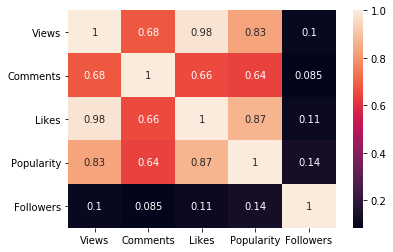

In [244]:
#Correlation
import seaborn as sns
plt.figure(figsize = (6,4))
cmap = df.corr()
sns.heatmap(cmap, annot = True)

(array([  273,   281,   374,   529,   847,   892,   970,   991,  1250,
        1268,  1652,  1759,  1785,  1834,  1906,  2252,  2455,  2501,
        2542,  2663,  2708,  2771,  2807,  2830,  2884,  2979,  3025,
        3437,  3491,  3856,  3901,  3934,  3989,  4014,  4096,  4129,
        4213,  4228,  4309,  4311,  4313,  4347,  4448,  4462,  4554,
        4613,  4671,  4909,  5097,  5216,  5459,  5475,  5590,  5608,
        5648,  5737,  5851,  5917,  6016,  6079,  6306,  6344,  6356,
        6363,  6451,  6464,  6638,  6784,  6920,  6927,  7379,  7431,
        7448,  7474,  7536,  7537,  7631,  7681,  7769,  7812,  7858,
        7884,  7974,  8094,  8260,  8387,  8503,  8671,  8748,  8751,
        9165,  9297,  9507,  9831,  9955, 10134, 10223, 10391, 10542,
       10575, 10668, 10691, 10695, 10760, 10835, 10923, 10939, 11047,
       11257, 11270, 11445, 11490, 11712, 11783, 11827, 11849, 11979,
       12207, 12208, 12261, 12273, 12291, 12391, 12408, 12499, 12534,
       12542, 12594

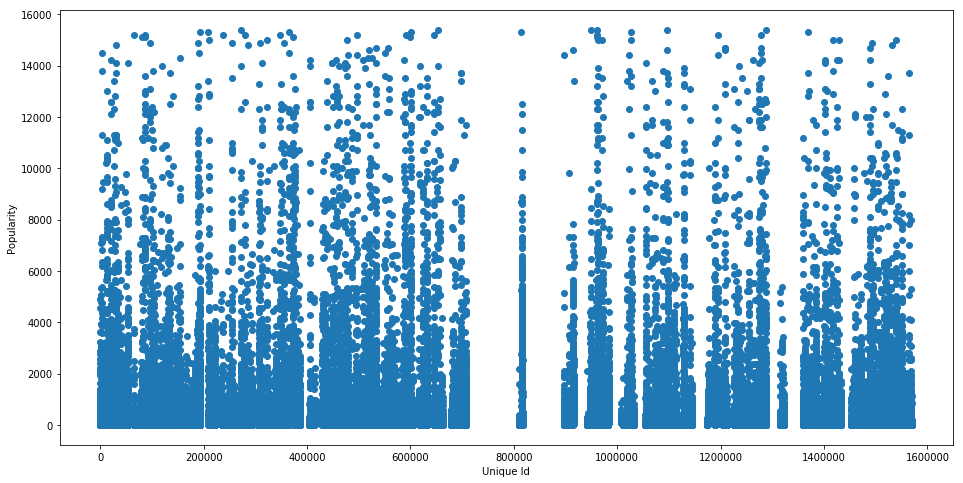

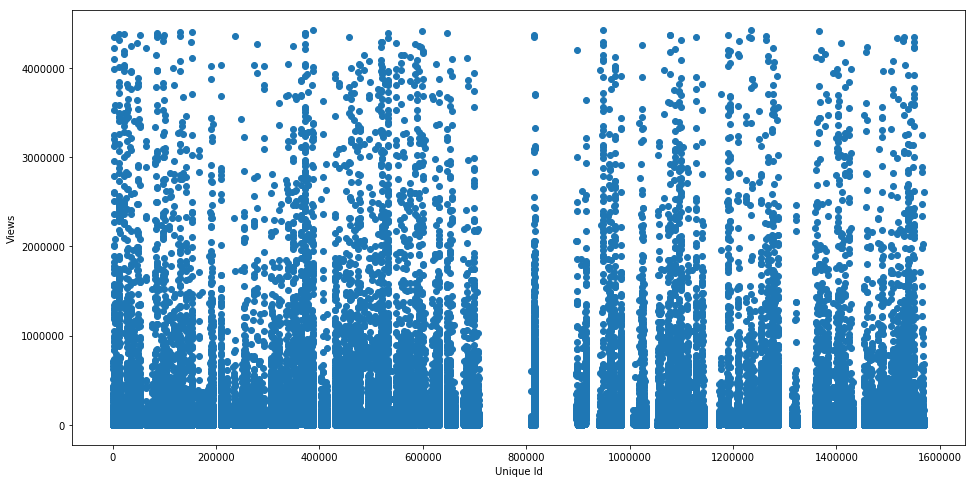

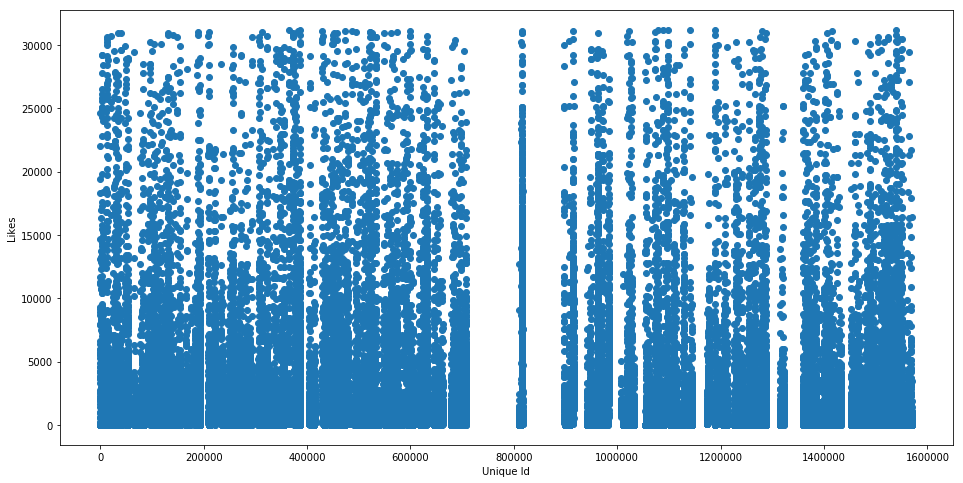

In [223]:

# Remove Outliers of Popularity
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Popularity']))
print(np.where(z > 3))
df = df[(z < 3)]
print(df.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Popularity'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Popularity')

# Remove Outliers of Views
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Views']))
print(np.where(z > 3))
df = df[(z < 3)]
print(df.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Views'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Views')

# Remove Outliers of Likes
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Likes']))
print(np.where(z > 3))
df = df[(z < 3)]
print(df.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Likes'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Likes')

print(df.shape)

In [215]:
# Extracting Genre, Likes, Popularity to X & Views to Y
X = df.drop(['Genre','Likes','Popularity','Name']]
Y = df['Views']
df_scaled = df[['Likes', 'Popularity']]
print(X.shape)
print(Y.shape)
print(X.head())


(73394, 4)
(73394,)
      Genre   Likes  Popularity              Name
0  danceedm   499.0        97.0         Hardstyle
1  danceedm    49.0        17.0        Dj Aladdin
2  danceedm   312.0        91.0  Maxximize On Air
3    rbsoul  2400.0        76.0       GR6 EXPLODE
4  danceedm  3031.0       699.0          Tritonal


In [203]:
#Hash the Name
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=10, input_type='string')
hashed_features = fh.fit_transform(X['Name'])
hashed_features = hashed_features.toarray()
hashed_name = pd.DataFrame(hashed_features)

In [204]:
#Hash the Genre
from sklearn.feature_extraction import FeatureHasher
fh_genre = FeatureHasher(n_features=4, input_type='string')
hashed_features_genre = fh_genre.fit_transform(X['Genre'])
hashed_features_genre = hashed_features_genre.toarray()
X = pd.DataFrame(hashed_features_genre)

In [205]:

# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# le_x = LabelEncoder()
# X_label = X.iloc[:, 0]
# X_le = le_x.fit_transform(X_label)
# X_le_df = pd.DataFrame(X_le)
# X_le_df.head(30)
# print(X_le_df.shape)
# print(df_scaled.shape)
# X_le_df_list = pd.DataFrame(X_le_df).values
# onehotencoder = OneHotEncoder()
# X_le_df_list = onehotencoder.fit_transform(X_le_df_list).toarray()
# X = pd.DataFrame(X_le_df_list)
# X_le_df.shape
# # df_scaled['label_genre']=X_le_df
# # df_scaled.head()


# # In[105]:

In [ ]:
# #Only Label encoding Genre and Name
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# le_x = LabelEncoder()
# X_label = X.iloc[:, 0]
# X_le = le_x.fit_transform(X_label)
# X_le_df = pd.DataFrame(X_le)
# X_le_df.head(30)
# print(X_le_df.shape)
# print(df_scaled.shape)
# X_le_df_list = pd.DataFrame(X_le_df).values
# onehotencoder = OneHotEncoder()
# X_le_df_list = onehotencoder.fit_transform(X_le_df_list).toarray()
# X = pd.DataFrame(X_le_df_list)
# X_le_df.shape
# # df_scaled['label_genre']=X_le_df
# # df_scaled.head()


In [206]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
df_scaled = sc_x.fit_transform(df.iloc[:, 8:10])
df_scaled = pd.DataFrame(df_scaled,columns=['Likes','Popularity'])
df_scaled.head(30)


# from sklearn.preprocessing import MinMaxScaler
# sc_x = MinMaxScaler()
# df_scaled = sc_x.fit_transform(df.iloc[:, 8:10])
# df_scaled = pd.DataFrame(df_scaled,columns=['Likes','Popularity'])
# df_scaled.head(30)

# #without scaling
# df_scaled = df.iloc[:, 8:10]
# df_scaled.head(30)

,Likes,Popularity
0,-0.418387,-0.342277
1,-0.513939,-0.440226
2,-0.458094,-0.349623
3,-0.014732,-0.367989
4,0.119253,0.394790
5,0.431177,-0.063122
6,-0.308396,-0.184334
7,-0.505657,-0.446348
8,-0.518398,-0.452470
9,-0.392269,-0.403495


In [207]:
#Joining two data frame along columns

df_train_old = X.join(df_scaled, lsuffix='_caller')
df_train = df_train_old.join(hashed_name,lsuffix='_caller')
print(df_train.shape)

(73394, 16)


In [208]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import xgboost as xgb

In [209]:

X = df_train
Y = Y
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
X_test_df = pd.DataFrame(X_test)
Y_test_df = pd.DataFrame(y_test)

X_test_df.to_csv(r'x_test.csv')
Y_test_df.to_csv(r'y_test.csv',sep='#')

In [210]:

xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print('\nMean Square error" ', mean_squared_error(y_test,y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

[16:58:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:282128
[1]	validation_0-rmse:259919
[2]	validation_0-rmse:240233


D:\Applns\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[3]	validation_0-rmse:222974
[4]	validation_0-rmse:207750
[5]	validation_0-rmse:194394
[6]	validation_0-rmse:182759
[7]	validation_0-rmse:172574
[8]	validation_0-rmse:163776
[9]	validation_0-rmse:156100
[10]	validation_0-rmse:149476
[11]	validation_0-rmse:143892
[12]	validation_0-rmse:138972
[13]	validation_0-rmse:134758
[14]	validation_0-rmse:131257
[15]	validation_0-rmse:128235
[16]	validation_0-rmse:125643
[17]	validation_0-rmse:123458
[18]	validation_0-rmse:121603
[19]	validation_0-rmse:120067
[20]	validation_0-rmse:118616
[21]	validation_0-rmse:117266
[22]	validation_0-rmse:116176
[23]	validation_0-rmse:115369
[24]	validation_0-rmse:114559
[25]	validation_0-rmse:113853
[26]	validation_0-rmse:113287
[27]	validation_0-rmse:112723
[28]	validation_0-rmse:112226
[29]	validation_0-rmse:111836
[30]	validation_0-rmse:111409
[31]	validation_0-rmse:111016
[32]	validation_0-rmse:110697
[33]	validation_0-rmse:110488
[34]	validation_0-rmse:110305
[35]	validation_0-rmse:110128
[36]	validation_0

In [2]:

y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()
# y_pred_df.iloc[:,:1,].to_csv(r'D:\Hackathon\MachineHack - Music\new\y_pred.csv')
y_pred_df.to_csv(r'y_pred.csv',sep='#')


NameError: name 'pd' is not defined

In [212]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
X_test = pd.DataFrame(X_test)